In [7]:
l1ascan = pd.read_hdf("/home/klay6683/to_keep/l1a_dark_scan.h5")

In [20]:
l1ascan = meta.clean_up_dark_scan(l1ascan)

In [21]:
ffi = l1ascan[(l1ascan.NAXIS1==1024) & (l1ascan.NAXIS2==1024)]

In [22]:
ffi.PRODUCT_ID.unique().shape

(1076,)

In [23]:
ffi.CHANNEL.value_counts()

MUV    561
FUV    561
Name: CHANNEL, dtype: int64

In [24]:
ffi.PRODUCT_ID.iloc[0]

'mvn_iuv_l1a_IPH1-cycle00002-mode050-fuvdark_20140403T115555_v02_r01'

In [25]:
ffi = ffi[ffi.COLLECTION_ID.isin('disk limb corona'.split())]

In [29]:
ffi.set_index("TIME_OF_INT", inplace=True)

In [31]:
ffi.sort_index(inplace=True)

In [33]:
l1a = io.L1AReader(ffi.PRODUCT_ID.iloc[0])

In [36]:
l1a.img.shape

(2, 1024, 1024)

<IPython.core.display.Javascript object>


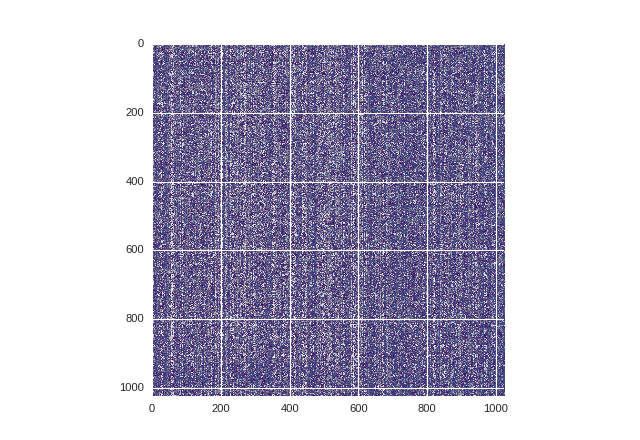

In [41]:
plt.figure()
plt.imshow(np.log(l1a.img[0]), cmap='viridis', )

In [42]:
l1a.fname

'/maven_iuvs/production/products/level1a/mvn_iuv_l1a_periapse-orbit01059-fuvdark_20150417T054342_v02_r01.fits.gz'

In [46]:
l1amuv = io.L1AReader(ffi.PRODUCT_ID.iloc[1])

<IPython.core.display.Javascript object>


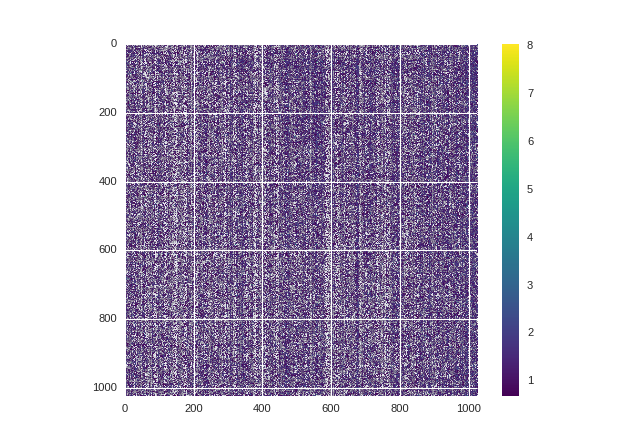

In [53]:
plt.figure()
plt.imshow(np.log(l1amuv.img[0]), cmap='viridis')
plt.colorbar()

In [52]:
l1amuv.primary_img_dn_s[0].mean()

0.75912976042247948

<IPython.core.display.Javascript object>


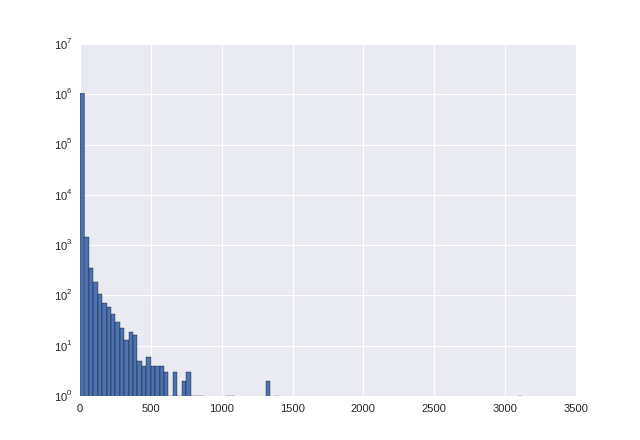

In [56]:
plt.figure()
plt.hist(l1amuv.img[0].ravel(), bins=100, log=True);